
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Interactive k-Means Clustering from Inferential Machine Learning


### Michael Pyrcz, Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### The Interactive Workflow

Here's an interative workflow for demonstrating the behavoir of k-means clustering's solution heuristic. This solution heuristic proposed by Hartigan and Wong (1979) iterates over these steps of:

* assign initial random prototype with labels

* assign samples to the nearest prototype label

* update prototype based on centroids of samples belonging to this prototype

* iterate until no sample assignments change

This is a solution heuristic that avoids exploration of the entire possible solution space, $n_{sol}$, defined as:

\begin{equation}
n_{sol} = K^n
\end{equation}

where $K$ is the number of clusters (categories) and $n$ is the number of data. When I teach this heuristic I state that it is practical, well-behaved and efficient. We avoid local minimums with a few multiple starts (change the seed and assign new initial prototypes).

But how well does this heuristic perform? Hartigan and Wong (1979) state that their heuristic finds local minimum at which point "no movemoment of a point from one cluster to another will reduce the within-cluster sum of squares". But, does it find the global minimum? Is it stable? How often does it get stuck in a 'bad' local minimum? 

* let's use interactive Python with MatPlotLib to build some models and observe the results over multiple seeds!

#### k-Means Clustering

The K-means clustering approach is primaryly applied as an unsupervised method for classification:

* **Prototype Method** - represents the training data with number of synthetic cases in the features space. For K-means clustering we assign and iteratively update $K$ prototypes.

* **Iterative Solution** - the initial prototypes are assigned randomly in the feature space, the labels for each training sample are updated to the nearest prototype, then the prototypes are adjusted to the centroid of their assigned training data, repeat until there is no further update to the training data assignments.

* **Unsupervised Learning** - the training data are not labeled and are assigned $K$ labels based on their proximity to the prototypes in the feature space.  The idea is that similar things, proximity in feature space, should belong to the same category.  

* **Feature Weighting** - the procedure depends on the 'distance' between training samples and prototypes in feature space.  Distance is treated as the 'inverse' of similarity. If the features have significantly different magnitudes, the feature(s) with the largest magnitudes and ranges will dominate the process.  One approach is to sandardize / normalize the variables.  Also, by-feature weighting may be applied.  In this demonstration we normalize the features to range from 0.0 to 1.0.

* Supervised Learning Variant for Classification of the Feature Space - applies multiple prototypes in each category to then constructs a decision boundary based on nearest prototype.  More prototypes per category results in a more complicated decision boundary in the feature space.  

See my YouTube channel for lectures on [k-means clustering](https://www.youtube.com/watch?v=oFE10cLl0Fs&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=13).   

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV.csv at https://git.io/fjmBH.

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Install Packages

We will include the standard packages for DataFrames and ndarrays and add sci-kit-learn (sklearn) for machine learning.

In [1]:
%matplotlib inline
import os                                               # to set current working directory 
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from sklearn.cluster import KMeans                      # k-means clustering
from matplotlib.pyplot import cm                        # color maps
from matplotlib.patches import Ellipse                  # plot an ellipse
from matplotlib.patches import Rectangle
import math                                             # sqrt operator
import alphashape                                       # convex hull for visualization
from scipy.stats import norm
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
plt.rc('axes', axisbelow=True)                          # grid behind plotting elements
# import warnings
# warnings.filterwarnings('ignore')                       # supress any warnings for this demonstration

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

In [2]:
import numpy
numpy.__version__

'1.22.0'

#### Loading Data

Let's load the provided multivariate, spatial dataset '12_sample_data.csv'.  It is a comma delimited file with: 

* X and Y coordinates ($m$)
* facies 0 and 1 
* porosity (fraction)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$). 

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specficy the name / variable representing that new object.

```python
df = pd.read_csv("12_sample_data.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

We do this to reduce the number of data for ease of visualization (hard to see if too many points on our plots).

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv')
df = df.sample(frac=.30, random_state = 73073); df = df.reset_index() # extract 30% random to reduce the number of data

pormin = df['Porosity'].min(); pormax = df['Porosity'].max()
AImin = df['AI'].min(); AImax = df['AI'].max()

df['Norm_Porosity'] = (df['Porosity']-pormin)/(pormax - pormin)
df['Norm_AI'] = (df['AI']-AImin)/(AImax - AImin)

### Interactive k-Means Clustering Method

The following code includes:

* the dashboard with widgets linked to plots to run k-means clustering over many seeds and number of iterations and to observe the results.

In [4]:
l = widgets.Text(value='           Machine Learning k-Means Clustering Heuristic Demo, Prof. Michael Pyrcz, The University of Texas at Austin',
                 layout=Layout(width='700px', height='30px'))

K = widgets.IntSlider(min=2, max = 20, value=2, step = 1, description = r'$K$',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
niter = widgets.IntSlider(min=0, max = 1000, value=1, step = 1, description = r'$n_{iter}$',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
seed = widgets.IntSlider(min=101, max = 999, value=777, step = 1, description = r'$seed$',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)

ui = widgets.HBox([K,niter,seed],)
ui2 = widgets.VBox([l,ui],)

def run_plot(K,niter,seed):
    np.random.seed(seed=seed)
    cent_init = np.random.rand(K,2)
    plt.subplot(121)
    if niter == 0:
        plt.scatter(df['Norm_Porosity'], df['Norm_AI'], c='black', alpha = 0.4, linewidths=1.0, edgecolors="black",cmap=plt.cm.inferno,vmin=1,vmax=K)

    for icent in range(0,K):
        plt.scatter([cent_init[icent,0]],[cent_init[icent,1]],c=icent+1,s=30,alpha = 0.8,linewidths=1.0,
         edgecolors="black",marker='s',cmap=plt.cm.inferno,vmin=1,vmax=K)
    if niter > 0:
        kmeans = KMeans(n_clusters=K,max_iter = niter,init=cent_init,random_state=14, n_init = 1).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values)
        df['kMeans'] = kmeans.labels_ + 1
        cent = kmeans.cluster_centers_           # (n_clusters, n_features)
        inertia = kmeans.inertia_
        
        plt.scatter(df['Norm_Porosity'], df['Norm_AI'], c=df['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black",cmap=plt.cm.inferno,vmin=1,vmax=K)
        cent_cur = KMeans(n_clusters=K,max_iter = 1,init=cent_init,random_state=14, n_init = 1).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values).cluster_centers_
        for icent in range(0,K):
            plt.scatter([cent_init[icent,0]],[cent_init[icent,1]],c=icent+1,s=30,alpha = 0.8,linewidths=1.0,
             edgecolors="black",marker='s',cmap=plt.cm.inferno,vmin=1,vmax=K)
            plt.scatter([cent[icent,0]],[cent[icent,1]],c=icent+1,s=200,alpha = 0.8,linewidths=1.0,
             edgecolors="black",marker='*',cmap=plt.cm.inferno,vmin=1,vmax=K,zorder=10)
            plt.plot([cent_init[icent,0],cent_cur[icent,0]],[cent_init[icent,1],cent_cur[icent,1]],
             alpha = 0.4,lw=2.0,ls='--',color='black',zorder=1)
    
    if niter > 1:
        for iters in range(2,niter+1):
            alpha = 0.4 + 0.6*((iters+1)/(niter+1))
            cent_cur = KMeans(n_clusters=K,max_iter = iters,init=cent_init,random_state=14, n_init = 1).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values).cluster_centers_
            cent_prev = KMeans(n_clusters=K,max_iter = iters-1,init=cent_init,random_state=14, n_init = 1).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values).cluster_centers_
            for icent in range(0,K):
                plt.plot([cent_prev[icent,0],cent_cur[icent,0]],[cent_prev[icent,1],cent_cur[icent,1]],
                 alpha = 0.4,lw=2.0,ls='--',color='black',zorder=1)
                         
    plt.title('k-Means Clusters with Cluster Prototype Iteration'); plt.xlabel('Predictor Feature #1 (normalized)'); plt.ylabel('Predictor Feature #2 (normalized)')
    plt.xlim(0, 1); plt.ylim(0, 1); plt.grid()
    
    nreal = 100; inertias = np.zeros(nreal)
    plt.subplot(122) 

    if niter > 0:
        plt.vlines(inertia,0,1,color='black',ls='--',lw=2,label='Shown Model')
        for icent in range(0,nreal):
            inertias[icent] = KMeans(n_clusters=K,max_iter = niter,init='random',random_state=14+icent,n_init = 1).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values).inertia_
    
        #plt.hist(inertias,bins=np.linspace(0,5,100),color='red',alpha=0.6,edgecolor='black')
        plt.plot(np.sort(inertias),np.linspace(0,1,nreal),color='red',lw=4,alpha=0.6,label='Realizations')
        plt.legend(loc='lower right')
    plt.xlim([0,12]); plt.ylim([0,1]); plt.xlabel('k-Means Clustering Inertia'); plt.ylabel('Cumulative Probability')
    plt.grid(); plt.title('k-Means Heurstic Performance Over Many Random Starts')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(run_plot, {'K':K,'niter':niter,'seed':seed})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive k-Means Clustering Heuristic Demonstration

* select $K$, random number $seed$ and step over the iterations of prototype location, observe the CDF of clustering inertia vs. the demonstrated case.

#### Michael Pyrcz, Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Inputs

Observe the k-means clustering soultion heuristic, e.g., step over iterations and change the random seed:

* $K$: number of k-means clusters, $n_{iter}$: number of iterations, $seed$: random number seed

In [5]:
display(ui2, interactive_plot)                           # display the interactive plot

Output()

#### Improved Summary Over Many Realizations to Explore Solution Uniqueness and Stability




In [6]:
l = widgets.Text(value='                       Machine Learning k-Means Clustering Heuristic Demo, Prof. Michael Pyrcz, The University of Texas at Austin',
        layout=Layout(width='930px', height='30px'))

K_summary = widgets.IntSlider(min=2, max = 20, value=2, step = 1, description = r'$K$',orientation='horizontal', 
        style = {'description_width': 'initial'},layout=Layout(width='200px', height='30px'),continuous_update=False)
niter_summary = widgets.IntSlider(min=1, max = 500, value=1, step = 1, description = r'$n_{iter}$',orientation='horizontal', 
        style = {'description_width': 'initial'},layout=Layout(width='200px', height='30px'), continuous_update=False)
seed_summary = widgets.IntSlider(min=101, max = 999, value=777, step = 1, description = r'$seed$',orientation='horizontal', 
        style = {'description_width': 'initial'},layout=Layout(width='200px', height='30px'), continuous_update=False)
ease_summary = widgets.FloatSlider(min=0.0,max=1.0,value=0.0,step=0.1,description = r'$ease$',orientation='horizontal', 
        style = {'description_width': 'initial'},layout=Layout(width='200px', height='30px'), continuous_update=False)

ui_summary = widgets.HBox([K_summary,niter_summary,seed_summary,ease_summary],)
ui2_summary = widgets.VBox([l,ui_summary],)

#from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
from matplotlib import colors
from scipy.stats import rankdata

def run_plot_summary(K_summary,niter_summary,seed_summary,ease_summary):
    np.random.seed(seed=seed_summary)
    nreal = 40; max_sol = 5
    cent = np.zeros([nreal,K_summary,2])
    inertia = np.zeros([nreal]); inertia_cluster = np.zeros([nreal])
    
    # Modify the data
    df_copy = df.copy(deep = 'True')
    data_kmeans = KMeans(n_clusters=K_summary,init='random',max_iter = 2,random_state=12,n_init = 1).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values)
    data_cent = data_kmeans.cluster_centers_
    #print(data_cent);
    data_labels = data_kmeans.labels_
    #print(data_labels)
    for idata in range(0,len(df)):
        px = data_cent[data_labels[idata],0]; py = data_cent[data_labels[idata],1] 
        #print(px,py)
        df_copy.loc[idata,'Norm_Porosity'] = (1-ease_summary)*df.loc[idata,'Norm_Porosity'] + ease_summary*px
        df_copy.loc[idata,'Norm_AI'] = (1-ease_summary)*df.loc[idata,'Norm_AI'] + ease_summary*py
    #print (df)
    
    plt.subplot(121)
    plt.scatter(df_copy['Norm_Porosity'], df_copy['Norm_AI'], c='white', alpha = 0.3, linewidths=1.0, edgecolors="black")

    for ireal in range(0,nreal):
        kmeans = KMeans(n_clusters=K_summary,init='random',max_iter = niter_summary,random_state=13+ireal,n_init = 1).fit(df_copy.loc[:,['Norm_Porosity','Norm_AI']].values)
        cur_cent = kmeans.cluster_centers_
        for k in range(0,K_summary):
            cent[ireal,k,0] = cur_cent[k,0]; cent[ireal,k,1] = cur_cent[k,1]
        inertia[ireal] = kmeans.inertia_
#     bandwidth = max(estimate_bandwidth(inertia.reshape(-1,1), quantile=0.2, n_samples=nreal),0.001)
#     mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#     mean_shift.fit(inertia.reshape(-1,1))
    dbscan = DBSCAN(eps=0.1, min_samples=2).fit(inertia.reshape(-1,1))
    #cent_flatten = np.reshape(cent,[nreal,K_summary*2])
    #print(cent_flatten)
    #dbscan = DBSCAN(eps=0.02, min_samples=10).fit(cent_flatten)
    inertia_cluster = dbscan.labels_+1
    
    #nsolution = int(np.max(inertia_cluster))+1
    nsolution = len(np.unique(inertia_cluster))
    if nsolution == 1:
        inertia_cluster = np.zeros(nreal)
    else:
        #inertia_cluster = np.round(nsolution*(inertia_cluster - np.min(inertia_cluster))/(np.max(inertia_cluster)-np.min(inertia_cluster)),0)
        inertia_cluster = rankdata(inertia_cluster,method = 'dense') - 1
    #print(nsolution)
    #print(inertia_cluster)
    #cluster_centers = ms.cluster_centers_
  
    #bounds = np.linspace(0,nsolution,nsolution+1)
    bounds = np.linspace(0,max_sol,max_sol+1)
    norm = colors.BoundaryNorm(bounds, plt.cm.inferno.N)

    for ireal in range(0,nreal):   
        for k in range(0,K_summary):
            if inertia_cluster[ireal] >= 0:
                im = plt.scatter([cent[ireal,k,0]],[cent[ireal,k,1]],c=inertia_cluster[ireal],s=30,alpha = 0.6,linewidths=1.0,
                 edgecolors="black",marker='s',norm=norm,cmap=plt.cm.inferno)
            else:
                im = plt.scatter([cent[ireal,k,0]],[cent[ireal,k,1]],s=30,alpha = 0.6,linewidths=1.0,
                 c="black",marker='x')
    
    ireal = 7
#     for k in range(0,K_summary):
#         plt.scatter([cent[ireal,k,0]],[cent[ireal,k,1]],c='black',s=90,alpha = 0.6,linewidths=1.0,
#                  edgecolors="black",marker='*',cmap=plt.cm.inferno)
    
    plt.title('k-Means Prototypes Iteration'); plt.xlabel('Predictor Feature #1 (normalized)'); plt.ylabel('Predictor Feature #2 (normalized)')
    plt.xlim(0, 1); plt.ylim(0, 1); plt.grid()
    # define the bins and normalize
    
    cbar = plt.colorbar(
        im, orientation="vertical",ticks=np.linspace(1,max_sol,max_sol)
    )
    cbar.set_label(label='Solution Groups', rotation=270, labelpad=20)
    
    plt.subplot(122) 
   
    #plt.hist(inertias,bins=np.linspace(0,5,100),color='red',alpha=0.6,edgecolor='black')
    
    plt.plot(np.sort(inertia_cluster)+1,np.linspace(0,1,nreal),color='red',lw=4,alpha=0.6,label='Realizations')
    plt.legend(loc='lower right')
    plt.xlim([0,max_sol]); plt.ylim([0,1]); plt.xlabel('Unique k-means Prototypes Solution Index'); plt.ylabel('Cumulative Probability')
    plt.grid(); plt.title('k-Means Heurstic Prototype Groups CDF')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)
    
# connect the function to make the samples and plot to the widgets    
interactive_plot_summary = widgets.interactive_output(run_plot_summary, {'K_summary':K_summary,'niter_summary':niter_summary,'seed_summary':seed_summary,'ease_summary':ease_summary,})
interactive_plot_summary.clear_output(wait = True)               # reduce flickering by delaying plot updating

In [7]:
display(ui2_summary, interactive_plot_summary)                           # display the interactive plot

Output()

In [47]:
l = widgets.Text(value='                       Machine Learning k-Means Clustering Heuristic Demo, Prof. Michael Pyrcz, The University of Texas at Austin',
        layout=Layout(width='930px', height='30px'))

K_summary = widgets.IntSlider(min=2, max = 20, value=3, step = 1, description = r'$K$',orientation='horizontal', 
        style = {'description_width': 'initial'},layout=Layout(width='200px', height='30px'),continuous_update=False)
niter_summary = widgets.IntSlider(min=1, max = 500, value=1, step = 1, description = r'$n_{iter}$',orientation='horizontal', 
        style = {'description_width': 'initial'},layout=Layout(width='200px', height='30px'), continuous_update=False)
seed_summary = widgets.IntSlider(min=101, max = 999, value=777, step = 1, description = r'$seed$',orientation='horizontal', 
        style = {'description_width': 'initial'},layout=Layout(width='200px', height='30px'), continuous_update=False)
ease_summary = widgets.FloatSlider(min=0.0,max=1.0,value=0.0,step=0.1,description = r'$ease$',orientation='horizontal', 
        style = {'description_width': 'initial'},layout=Layout(width='200px', height='30px'), continuous_update=False)

ui_summary = widgets.HBox([K_summary,niter_summary,seed_summary,ease_summary],)
ui2_summary = widgets.VBox([l,ui_summary],)

#from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
from matplotlib import colors
from scipy.stats import rankdata
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import alphashape
from scipy.spatial import Delaunay

def run_plot_summary(K_summary,niter_summary,seed_summary,ease_summary):
    np.random.seed(seed=seed_summary)
    nreal = 10; max_sol = 7
    cent = np.zeros([nreal,K_summary,2])
    inertia = np.zeros([nreal]); inertia_cluster = np.zeros([nreal])
    
    # Modify the data
    df_copy = df.copy(deep = 'True')
    data_kmeans = KMeans(n_clusters=K_summary,init='random',max_iter = 3,random_state=10,n_init = 1).fit(df.loc[:,['Norm_Porosity','Norm_AI']].values)
    data_cent = data_kmeans.cluster_centers_
    #print(data_cent);
    data_labels = data_kmeans.labels_
    #print(data_labels)
    for idata in range(0,len(df)):
        px = data_cent[data_labels[idata],0]; py = data_cent[data_labels[idata],1] 
        #print(px,py)
        df_copy.loc[idata,'Norm_Porosity'] = (1-ease_summary)*df.loc[idata,'Norm_Porosity'] + ease_summary*px
        df_copy.loc[idata,'Norm_AI'] = (1-ease_summary)*df.loc[idata,'Norm_AI'] + ease_summary*py
    #print (df)
    
    plt.subplot(121)
    plt.scatter(df_copy['Norm_Porosity'], df_copy['Norm_AI'], c='white', alpha = 0.3, linewidths=1.0, edgecolors="black")

    for ireal in range(0,nreal):
        kmeans = KMeans(n_clusters=K_summary,init='random',max_iter = niter_summary,random_state=13+ireal,n_init = 1).fit(df_copy.loc[:,['Norm_Porosity','Norm_AI']].values)
        cur_cent = kmeans.cluster_centers_
        for k in range(0,K_summary):
            cent[ireal,k,0] = cur_cent[k,0]; cent[ireal,k,1] = cur_cent[k,1]
        inertia[ireal] = kmeans.inertia_
#     bandwidth = max(estimate_bandwidth(inertia.reshape(-1,1), quantile=0.2, n_samples=nreal),0.001)
#     mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#     mean_shift.fit(inertia.reshape(-1,1))
    dbscan = DBSCAN(eps=0.1, min_samples=2).fit(inertia.reshape(-1,1))
    #cent_flatten = np.reshape(cent,[nreal,K_summary*2])
    #print(cent_flatten)
    #dbscan = DBSCAN(eps=0.02, min_samples=10).fit(cent_flatten)
    inertia_cluster = dbscan.labels_+1
    
    #nsolution = int(np.max(inertia_cluster))+1
    nsolution = len(np.unique(inertia_cluster))
    if nsolution == 1:
        inertia_cluster = np.zeros(nreal)
    else:
        #inertia_cluster = np.round(nsolution*(inertia_cluster - np.min(inertia_cluster))/(np.max(inertia_cluster)-np.min(inertia_cluster)),0)
        inertia_cluster = rankdata(inertia_cluster,method = 'dense') - 1
    #print(nsolution)
    #print(inertia_cluster)
    #cluster_centers = ms.cluster_centers_
  
    #bounds = np.linspace(0,nsolution,nsolution+1)
    bounds = np.linspace(0,max_sol,max_sol+1)
    norm = colors.BoundaryNorm(bounds, plt.cm.inferno.N)

    #print(cent[ireal,:,:])
    for ireal in range(0,nreal):   
                    
        #hull = ConvexHull(cent[ireal,:,:])
        alpha_shape = alphashape.alphashape(cent[ireal,:,:], 0.)
        #plt.plot(cent[ireal,:,:][hull.vertices,0], cent[ireal,:,:][hull.vertices,1], 'r--', lw=2)
 
        #print(cent[ireal,:,:][hull.vertices,0])
#         print(type(alpha_shape))
        #x,y = alpha_shape.xy
        x,y = alpha_shape.exterior.coords.xy
        poly = np.vstack((x,y))
        
        #print(np.transpose(poly))
        t2 = plt.Polygon(np.transpose(poly), color=plt.cm.inferno(ireal/nreal),alpha=0.01)
        plt.gca().add_patch(t2)


        #poly2 = np.vstack((cent[ireal,:,:][hull.vertices,0],cent[ireal,:,:][hull.vertices,1]))
        poly2 = np.vstack((cent[ireal,:,0],cent[ireal,:,1]))
        #print(poly2)
        tri = Delaunay(np.transpose(poly2))
        plt.triplot(cent[ireal,:,0],cent[ireal,:,1],tri.simplices,
                    c=plt.cm.inferno(ireal/nreal),alpha=0.2,zorder=1)
    
        for k in range(0,K_summary):
            if inertia_cluster[ireal] >= 0:
                im = plt.scatter([cent[ireal,k,0]],[cent[ireal,k,1]],c=ireal,s=30,alpha = 0.2,linewidths=1.0,
                  edgecolors="black",marker='s',cmap=plt.cm.inferno,vmin=0,vmax=nreal,zorder=10)
                #if k > 0:
                    #plt.plot([cent[ireal,k,0],cent[ireal,k-1,0]],[cent[ireal,k,1],cent[ireal,k-1,1]],c='black')
                    
            else:
                im = plt.scatter([cent[ireal,k,0]],[cent[ireal,k,1]],s=30,alpha = 0.6,linewidths=1.0,
                 c="black",marker='x',zorder=10)
    
    ireal = 7
#     for k in range(0,K_summary):
#         plt.scatter([cent[ireal,k,0]],[cent[ireal,k,1]],c='black',s=90,alpha = 0.6,linewidths=1.0,
#                  edgecolors="black",marker='*',cmap=plt.cm.inferno)
    
    plt.title('k-Means Prototypes Iteration'); plt.xlabel('Predictor Feature #1 (normalized)'); plt.ylabel('Predictor Feature #2 (normalized)')
    plt.xlim(0, 1); plt.ylim(0, 1); plt.grid()
    # define the bins and normalize
    
#     cbar = plt.colorbar(
#         im, orientation="vertical",ticks=np.linspace(1,max_sol,max_sol)
#     )
#     cbar.set_label(label='Solution Groups', rotation=270, labelpad=20)
    
    plt.subplot(122) 
   
    #plt.hist(inertias,bins=np.linspace(0,5,100),color='red',alpha=0.6,edgecolor='black')
    
#     plt.plot(np.sort(inertia_cluster)+1,np.linspace(0,1,nreal),color='red',lw=4,alpha=0.6,label='Realizations')
    plt.plot(np.sort(inertia),np.linspace(0,1,nreal),color='red',lw=4,alpha=0.6,label='Realizations')
    plt.legend(loc='lower right')
#    plt.xlim([0,max_sol]); 
    plt.xlim([3.0,6.0])
    plt.ylim([0,1]); plt.xlabel('Inertia'); plt.ylabel('Cumulative Probability')
    plt.grid(); plt.title('k-Means Heurstic Solutions Inertia CDF')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)
    
# connect the function to make the samples and plot to the widgets    
interactive_plot_summary = widgets.interactive_output(run_plot_summary, {'K_summary':K_summary,'niter_summary':niter_summary,'seed_summary':seed_summary,'ease_summary':ease_summary,})
interactive_plot_summary.clear_output(wait = True)               # reduce flickering by delaying plot updating

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 2 Axes>', 'i…

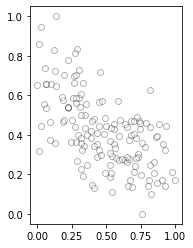

In [48]:
display(ui2_summary, interactive_plot_summary)                           # display the interactive plot

ValueError: 0.1 is not a valid value for color

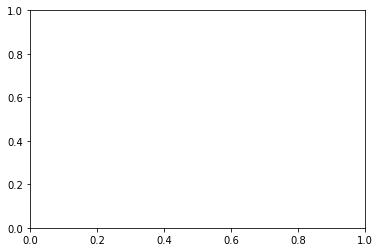

In [10]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
plt.plot(points,c=0.1,cmap=plt.cm.inferno,vmin=0,vmax=1)

#### Comments

This was an interactive demonstration of simple kriging behavoir, the impact of data closeness and redudancy on kriging weights for spatial data analytics. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  